# Top 500 supercomputers & VSC

Import modules and configure defaults.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Define conversion function for dates formatted as, e.g., 'Jun-15'.

In [2]:
def dt_conv(dt):
        return pd.datetime.strptime(dt, '%b-%y')

Read the data from a CSV file, use the date as index, and convert the latter to an actual date. Column names are automatically inferred.

In [3]:
top500 = pd.read_csv('top500.csv', index_col='date', converters={0: dt_conv})
top500

,Rmax_1,Rmax_500,VSC_rank,Rmax_VSC
date,,,,
2011-12-01,10510000.0,50941.0,NaN,NaN
2012-06-01,16324751.0,60824.0,118.0,152348.0
2012-11-01,17590000.0,76411.0,163.0,152348.0
2013-06-01,33862700.0,96619.0,239.0,152348.0
2013-11-01,33862700.0,117831.0,306.0,152348.0
2014-06-01,33862700.0,133700.0,429.0,152348.0
2014-11-01,33862700.0,153381.0,NaN,152348.0
2015-06-01,33862700.0,164790.0,NaN,152348.0
2015-11-01,33862700.0,206304.0,NaN,152348.0


Create the plot.

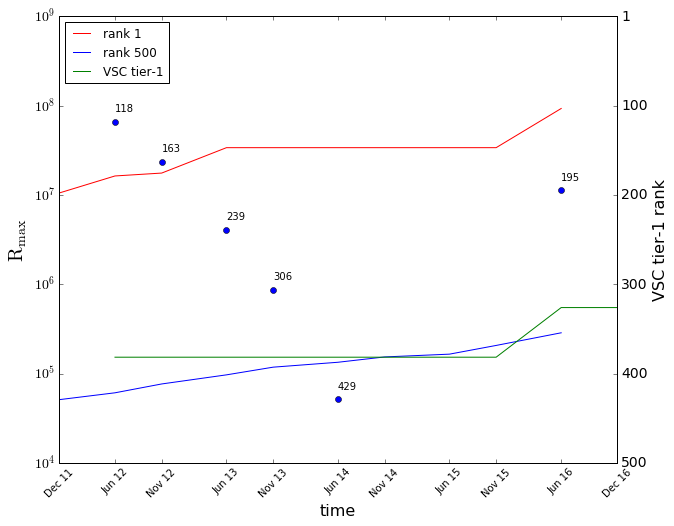

In [4]:
figure, axes = plt.subplots()
figure.set_figwidth(10.0)
figure.set_figheight(8.0)
axes.plot_date(top500.index, np.log10(top500.Rmax_1), 'r-', label=r'rank 1')
axes.plot_date(top500.index, np.log10(top500.Rmax_500), 'b-', label=r'rank 500')
axes.plot_date(top500.index, np.log10(top500.Rmax_VSC), 'g-', label=r'VSC tier-1')
axes.set_xlabel('time', size=16)
axes.set_xticks(top500.index)
axes.set_xticklabels([pd.datetime.strftime(x, '%b %y') for x in top500.index])
for tick_label in axes.get_xticklabels():
    tick_label.set_rotation(45)
axes.set_ylabel(r'$\mathrm{R}_{\mathrm{max}}$', size=20)
axes.set_yticks(range(4, 10))
axes.set_yticklabels([r'$10^{0:d}$'.format(x) for x in range(4, 10)], size=14)
axes2 = axes.twinx()
axes2.set_ylabel('VSC tier-1 rank', size=16)
axes2.set_ylim(500, 0)
axes2.set_yticklabels([1, 100, 200, 300, 400, 500], size=14)
axes2.plot_date(top500.index, top500.VSC_rank, 'o')
for date, rank in zip(top500.index, top500.VSC_rank):
    axes2.annotate('{:.0f}'.format(rank), xy=(date, rank - 11))
axes.legend(loc='upper left');